In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

In [2]:
wine = pd.read_csv('D:\\2021 - Fall Semester\\1 - class\\577data\\wine.csv')

wine

,type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
sub_wine = wine.loc[wine['type']==1, ['type', 'Alcohol', 'Color intensity']]

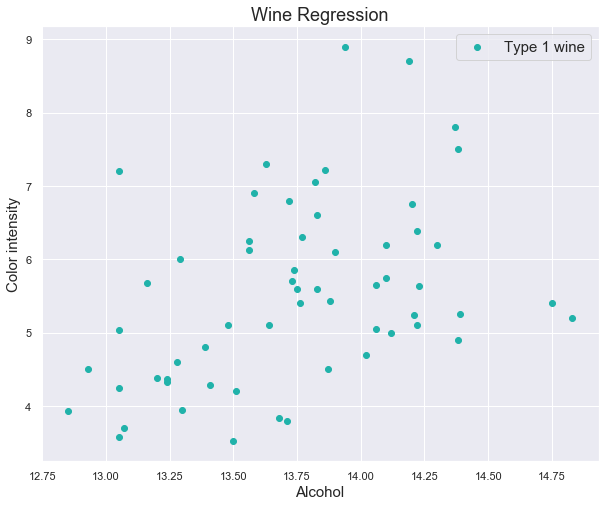

In [11]:
plt.figure(figsize = (10, 8))
plt.scatter(sub_wine['Alcohol'], 
            sub_wine['Color intensity'], 
            color = "lightseagreen",
            label = "Type 1 wine")
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("Color intensity", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Wine Regression", fontsize = 18)
plt.show()

In [12]:
class SingleNeuron(object):
    
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

In [15]:
X = sub_wine['Alcohol'].values
X = X.reshape(-1, 1)
y = sub_wine['Color intensity'].values

y

array([5.64, 4.38, 5.68, 7.8 , 4.32, 6.75, 5.25, 5.05, 5.2 , 7.22, 5.75,
       5.  , 5.6 , 5.4 , 7.5 , 7.3 , 6.2 , 6.6 , 8.7 , 5.1 , 5.65, 4.5 ,
       3.8 , 3.93, 3.52, 3.58, 4.8 , 3.95, 4.5 , 4.7 , 5.7 , 6.9 , 3.84,
       5.4 , 4.2 , 5.1 , 4.6 , 4.25, 3.7 , 5.1 , 6.13, 4.28, 5.43, 4.36,
       5.04, 5.24, 4.9 , 6.1 , 6.2 , 8.9 , 7.2 , 5.6 , 7.05, 6.3 , 5.85,
       6.25, 6.38, 6.  , 6.8 ])

In [16]:
def linear_activation(z):
    return(z)

model0 = SingleNeuron(linear_activation)
model0.train(X, y, alpha = 0.0001, epochs = 5)

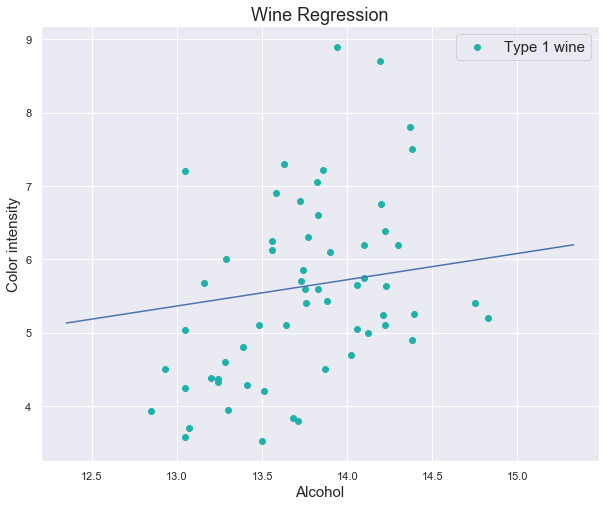

In [18]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Type 1 wine")
plt.plot(domain, model0.predict(domain.reshape(-1, 1)))
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("Color intensity", fontsize = 15)
plt.title("Wine Regression", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

# So we see the result of regression is decent. It crosses over the majority spread of data points.